# Programming Assignment 1

### Instructions

In this exercise, you will build a simple regression model in TensorFlow 2. The network predicts the price of a house according to a simple formula  50000 + (50000 per bedroom), so that a one bedroom house will be 100000, a two bedroom house costs 150k etc.

## Resources:  ( Part A)


In [25]:
#import the libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

In [26]:
#Load the data
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 10.0], dtype=float)
y = np.array([100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 550.0], dtype=float)

In [27]:
#Define the architecture
# Here, you define, the number of layers, the number of neurons per layer, and the activations, include the parameter input_shape, in the first layer, so you can print the architecure, WE DID'T REVIEW THIS PARAMETER IN CLASS, BUT MAKE SOME RESEARCH

#your code here
dataNormalizer = layers.Normalization(input_shape=[1,], axis=None)
dataNormalizer.adapt(x)

model = keras.Sequential([
    dataNormalizer,
    layers.Dense(units=1)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [28]:
# Compile the model.compile(optimizer=' ', loss='') select the optimizer y loss that better fit the problem.

model.compile(
    optimizer= keras.optimizers.Adam(learning_rate=0.5),
    loss='mean_absolute_error')

In [29]:
#Train the model, using model.fit.  Here, use history, which store the loss per iteration.
history = model.fit(
    x,
    y,
    epochs=1000,
    verbose=0,
    validation_split = 0.2)

In [30]:
#load the history into a panda dataframe

df = pd.DataFrame(history.history)
df.head

<bound method NDFrame.head of            loss    val_loss
0    200.499466  448.895996
1    199.741608  449.040619
2    198.983765  449.185242
3    198.225906  449.329895
4    197.468063  449.474548
..          ...         ...
995    0.126929    0.086853
996    0.117154    0.002991
997    0.008084    0.055969
998    0.015359    0.026184
999    0.054074    0.015671

[1000 rows x 2 columns]>

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'loss')]

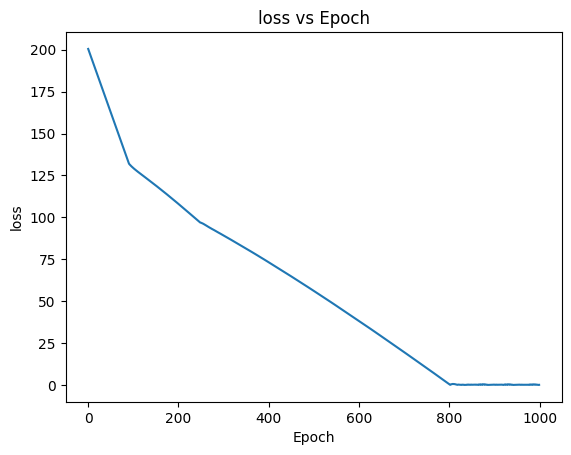

In [31]:
#make a plot for the loss

loss_plot = df.plot(y="loss", title="loss vs Epoch", legend=False)
loss_plot.set(xlabel="Epoch", ylabel="loss")

In [32]:
#Predict, predict the the value of y for x=7 using your new model

x = tf.linspace(0.0, 250, 251)
model.predict([7])

1/1 [==============================] - 0s 79ms/step


array([[400.01062]], dtype=float32)